In [44]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib  import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error

In [2]:
index = pd.date_range('11/07/2019', periods=35, freq='D')
df = pd.read_csv('Murali.csv',parse_dates=True)

In [21]:
df.tail()

,DBSize
2019-12-07,5.42
2019-12-08,5.48
2019-12-09,5.53
2019-12-10,5.58
2019-12-11,5.64


In [4]:
df.set_index(index, inplace=True)

In [5]:
df.drop('Date', axis=1, inplace=True)

In [6]:
df.index

DatetimeIndex(['2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10',
               '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df.shape

(35, 1)

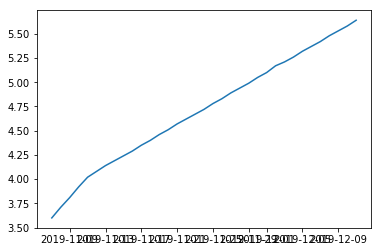

In [8]:
pyplot.plot(df.index,df.DBSize)
#plt.figure(figsize=(12,6))

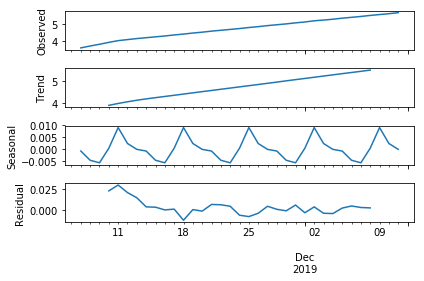

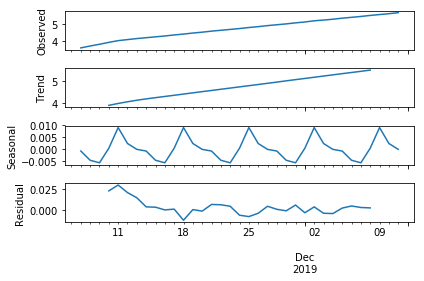

In [9]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()

In [10]:
X = df.values
size = int(len(X) * 0.9)
size

31

In [11]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
history

[array([3.6]),
 array([3.71]),
 array([3.81]),
 array([3.92]),
 array([4.02]),
 array([4.08]),
 array([4.14]),
 array([4.19]),
 array([4.24]),
 array([4.29]),
 array([4.35]),
 array([4.4]),
 array([4.46]),
 array([4.51]),
 array([4.57]),
 array([4.62]),
 array([4.67]),
 array([4.72]),
 array([4.78]),
 array([4.83]),
 array([4.89]),
 array([4.94]),
 array([4.99]),
 array([5.05]),
 array([5.1]),
 array([5.17]),
 array([5.21]),
 array([5.26]),
 array([5.32]),
 array([5.37]),
 array([5.42])]

In [12]:
test

array([[5.48],
       [5.53],
       [5.58],
       [5.64]])

In [13]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=5.474137, expected=5.480000
predicted=5.536700, expected=5.530000
predicted=5.587347, expected=5.580000
predicted=5.634097, expected=5.640000


In [14]:
error = mean_squared_error(test, predictions)
error

4.202128969758246e-05

In [15]:
test

array([[5.48],
       [5.53],
       [5.58],
       [5.64]])

In [16]:
predictions

[array([5.47413714]),
 array([5.53670008]),
 array([5.58734688]),
 array([5.63409709])]

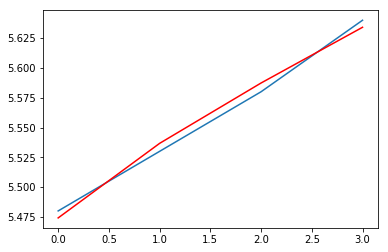

In [17]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')

In [18]:
forecast = model_fit.forecast()[0]

In [19]:
forecast

array([5.63409709])

In [20]:
forecast = model_fit.forecast()[0]
forecast

array([5.63409709])

In [22]:
from pandas import datetime
start_index = datetime(2019, 12, 12)
end_index = datetime(2019, 12, 22)
forecast = model_fit.predict(start=start_index, end=end_index)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.datetime'

In [26]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=150)[0]


In [27]:
forecast

array([ 5.63409709,  5.68704622,  5.74264179,  5.80068218,  5.86006209,
        5.92126844,  5.98368368,  6.0467017 ,  6.11007038,  6.17334055,
        6.23621538,  6.29854988,  6.3602398 ,  6.42129168,  6.48178518,
        6.54183346,  6.60157955,  6.66116868,  6.72073025,  6.78037045,
        6.84016392,  6.90015236,  6.96034764,  7.02073645,  7.0812872 ,
        7.14195748,  7.20270089,  7.26347294,  7.32423556,  7.38495984,
        7.44562719,  7.50622923,  7.56676645,  7.62724631,  7.68768094,
        7.74808479,  7.80847257,  7.86885763,  7.92925073,  7.98965948,
        8.05008814,  8.11053791,  8.17100743,  8.23149347,  8.29199169,
        8.35249737,  8.41300595,  8.47351357,  8.53401727,  8.59451515,
        8.65500636,  8.71549096,  8.77596971,  8.83644385,  8.89691484,
        8.95738421,  9.01785329,  9.0783232 ,  9.13879471,  9.19926826,
        9.25974395,  9.32022166,  9.38070106,  9.4411817 ,  9.5016631 ,
        9.56214479,  9.62262639,  9.68310758,  9.74358818,  9.80

In [34]:
li = list()
for x in df.iloc[:,0].values:
    li.append(x)
li

[3.6,
 3.71,
 3.81,
 3.92,
 4.02,
 4.08,
 4.14,
 4.19,
 4.24,
 4.29,
 4.35,
 4.4,
 4.46,
 4.51,
 4.57,
 4.62,
 4.67,
 4.72,
 4.78,
 4.83,
 4.89,
 4.94,
 4.99,
 5.05,
 5.1,
 5.17,
 5.21,
 5.26,
 5.32,
 5.37,
 5.42,
 5.48,
 5.53,
 5.58,
 5.64]

In [37]:
for k in forecast:
    li.append(k)

In [39]:
li

[3.6,
 3.71,
 3.81,
 3.92,
 4.02,
 4.08,
 4.14,
 4.19,
 4.24,
 4.29,
 4.35,
 4.4,
 4.46,
 4.51,
 4.57,
 4.62,
 4.67,
 4.72,
 4.78,
 4.83,
 4.89,
 4.94,
 4.99,
 5.05,
 5.1,
 5.17,
 5.21,
 5.26,
 5.32,
 5.37,
 5.42,
 5.48,
 5.53,
 5.58,
 5.64,
 5.634097091922434,
 5.68704622116445,
 5.742641793353586,
 5.800682184045493,
 5.860062089390439,
 5.921268438623889,
 5.983683681025325,
 6.046701696825829,
 6.110070381382752,
 6.173340550365763,
 6.236215382436482,
 6.298549878269454,
 6.360239796382128,
 6.421291678728827,
 6.481785180185225,
 6.541833464983659,
 6.6015795497790135,
 6.661168677458788,
 6.720730247387916,
 6.780370451415915,
 6.840163923703281,
 6.900152359069791,
 6.96034763868081,
 7.020736448172308,
 7.081287201259928,
 7.141957484784013,
 7.202700885129674,
 7.263472937423897,
 7.324235564903341,
 7.384959840160042,
 7.445627194153033,
 7.506229226679746,
 7.566766445447771,
 7.627246311326656,
 7.6876809399123625,
 7.748084786857361,
 7.808472574023448,
 7.868857628578429

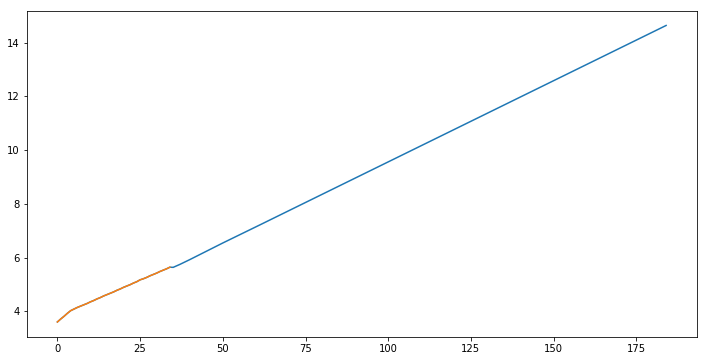

In [46]:
pyplot.figure(figsize=(12,6))
pyplot.plot(li)
pyplot.plot(df.values)